In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [22]:
# taking a dataset of CardioVescular deases
dataset = r"D:\machine learning files\archive (2)\heart.csv"
data_set=pd.read_csv(dataset)
data_set.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
cat_gorical = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [30]:
# doing one hot encoded in the dataset for making more features
one_hot_encoded = pd.get_dummies(data =data_set,prefix=cat_gorical,columns=cat_gorical,dtype=int)

In [31]:
one_hot_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [39]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [44]:
features = [x for x in one_hot_encoded.columns if x not in 'HeartDisease']
print(features)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [71]:
X_train,X_test,Y_train,Y_test =train_test_split(one_hot_encoded[features],one_hot_encoded['HeartDisease'],
                                                test_size=0.2,random_state=55) 

In [76]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,


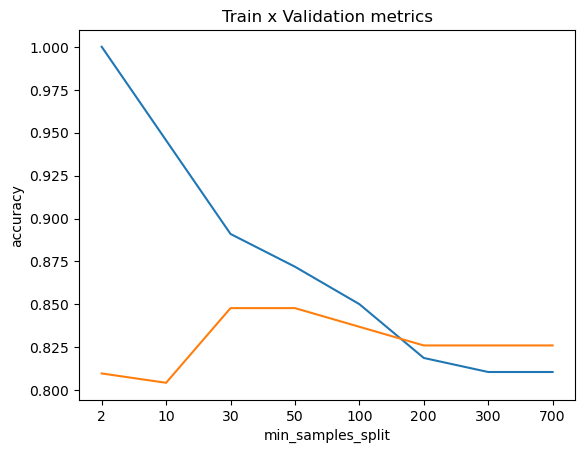

In [73]:
training_accuracy = []
testing_accuracy = []
for min_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split=min_split,
                                  random_state=55)
    model.fit(X_train,Y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    train_acc = accuracy_score(train_prediction,Y_train)
    testing_acc   = accuracy_score(test_prediction,Y_test)
    training_accuracy.append(train_acc)
    testing_accuracy.append(testing_acc)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(training_accuracy)
plt.plot(testing_accuracy)


In [54]:
 model = DecisionTreeClassifier(min_samples_split =3,
                                   random_state = 55)

In [59]:
testing_accuracy

[0.8097826086956522,
 0.8043478260869565,
 0.8478260869565217,
 0.8478260869565217,
 0.8369565217391305,
 0.8260869565217391,
 0.8260869565217391,
 0.8260869565217391]

In [60]:
training_accuracy

[1.0,
 0.9455040871934605,
 0.8910081743869209,
 0.8719346049046321,
 0.8501362397820164,
 0.8188010899182562,
 0.8106267029972752,
 0.8106267029972752]

In [91]:
max_depth_list =[1,2, 3, 4, 8, 16, 32, 64,None]
max_depth_list

[1, 2, 3, 4, 8, 16, 32, 64, None]

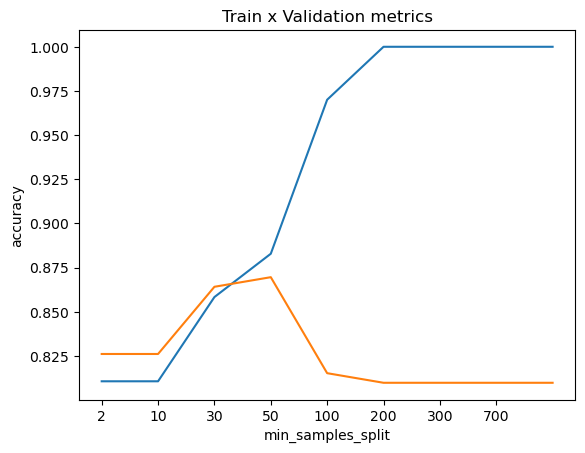

In [99]:
# max dept list
training_accuracy = []
testing_accuracy = []
for min_split in max_depth_list:
    model = DecisionTreeClassifier(max_depth=min_split,
                                  random_state=55)
    model.fit(X_train,Y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    train_acc = accuracy_score(train_prediction,Y_train)
    testing_acc   = accuracy_score(test_prediction,Y_test)
    training_accuracy.append(train_acc)
    testing_accuracy.append(testing_acc)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(training_accuracy)
plt.plot(testing_accuracy)


In [100]:
training_accuracy

[0.8106267029972752,
 0.8106267029972752,
 0.8583106267029973,
 0.8828337874659401,
 0.9700272479564033,
 1.0,
 1.0,
 1.0,
 1.0]

In [101]:
testing_accuracy

[0.8260869565217391,
 0.8260869565217391,
 0.8641304347826086,
 0.8695652173913043,
 0.8152173913043478,
 0.8097826086956522,
 0.8097826086956522,
 0.8097826086956522,
 0.8097826086956522]

In [103]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] 
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

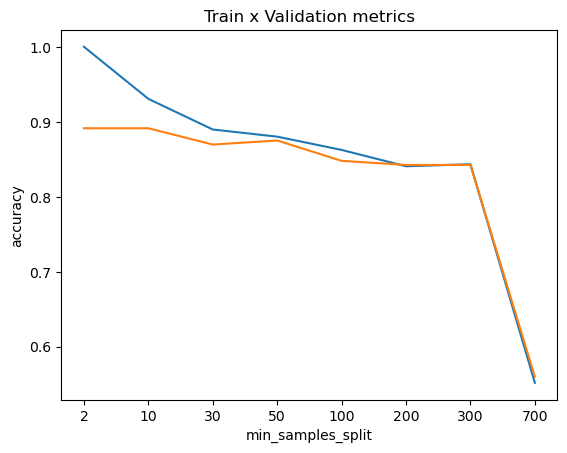

In [106]:
# max dept list
training_accuracy = []
testing_accuracy = []
for min_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split=min_split,
                                  random_state=55)
    model.fit(X_train,Y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    train_acc = accuracy_score(train_prediction,Y_train)
    testing_acc   = accuracy_score(test_prediction,Y_test)
    training_accuracy.append(train_acc)
    testing_accuracy.append(testing_acc)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(training_accuracy)
plt.plot(testing_accuracy)


In [107]:
training_accuracy

[1.0,
 0.9305177111716622,
 0.8896457765667575,
 0.8801089918256131,
 0.8623978201634878,
 0.840599455040872,
 0.8433242506811989,
 0.5517711171662125]

In [108]:
testing_accuracy

[0.8913043478260869,
 0.8913043478260869,
 0.8695652173913043,
 0.875,
 0.8478260869565217,
 0.842391304347826,
 0.842391304347826,
 0.5597826086956522]

In [110]:
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

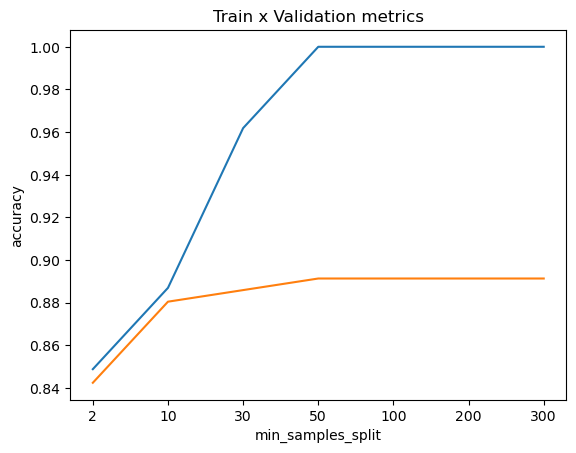

In [111]:
# max dept list
training_accuracy = []
testing_accuracy = []
for min_split in max_depth_list:
    model = RandomForestClassifier(max_depth=min_split,
                                  random_state=55)
    model.fit(X_train,Y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    train_acc = accuracy_score(train_prediction,Y_train)
    testing_acc   = accuracy_score(test_prediction,Y_test)
    training_accuracy.append(train_acc)
    testing_accuracy.append(testing_acc)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(training_accuracy)
plt.plot(testing_accuracy)


In [112]:
training_accuracy


[0.8487738419618529,
 0.8869209809264306,
 0.9618528610354223,
 1.0,
 1.0,
 1.0,
 1.0]

In [113]:
testing_accuracy

[0.842391304347826,
 0.8804347826086957,
 0.8858695652173914,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869,
 0.8913043478260869]

In [114]:
n_estimators_list = [10,50,100,500]

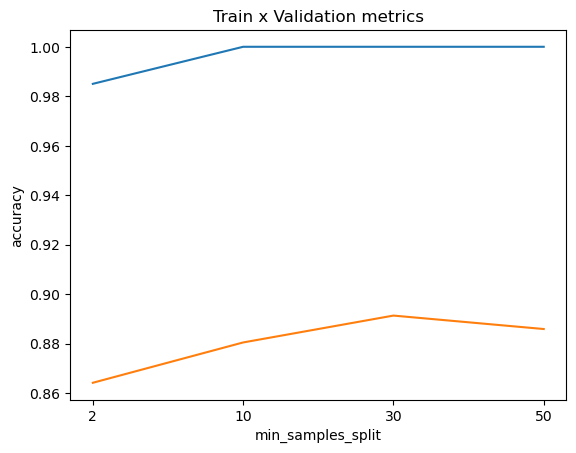

In [116]:
# max dept list
training_accuracy = []
testing_accuracy = []
for min_split in n_estimators_list:
    model = RandomForestClassifier(n_estimators=min_split,
                                  random_state=55)
    model.fit(X_train,Y_train)
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    train_acc = accuracy_score(train_prediction,Y_train)
    testing_acc   = accuracy_score(test_prediction,Y_test)
    training_accuracy.append(train_acc)
    testing_accuracy.append(testing_acc)
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(training_accuracy)
plt.plot(testing_accuracy)


In [117]:
training_accuracy

[0.9850136239782016, 1.0, 1.0, 1.0]

In [118]:
testing_accuracy

[0.8641304347826086,
 0.8804347826086957,
 0.8913043478260869,
 0.8858695652173914]